In [66]:
# import des librairies dont nous aurons besoin
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib as plt
import missingno as msno

In [67]:
# chargement et affichage des données
data = pd.read_csv('../data.csv')
print(data)

      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]


In [68]:
print(data.shape)

(1338, 7)


# Détectez les erreurs
#### les valeurs manquantes 

In [69]:
print(data.isnull().sum())

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64


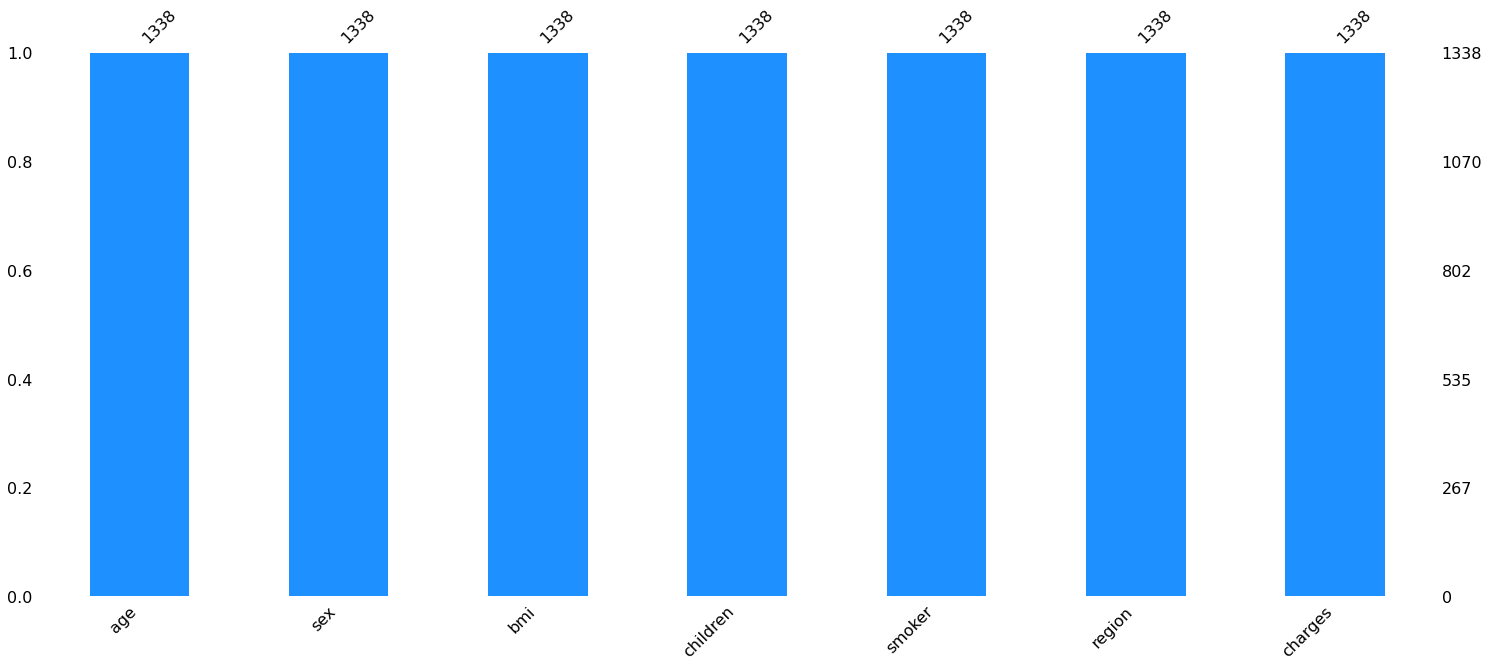

In [70]:
msno.bar(data,  color="dodgerblue");

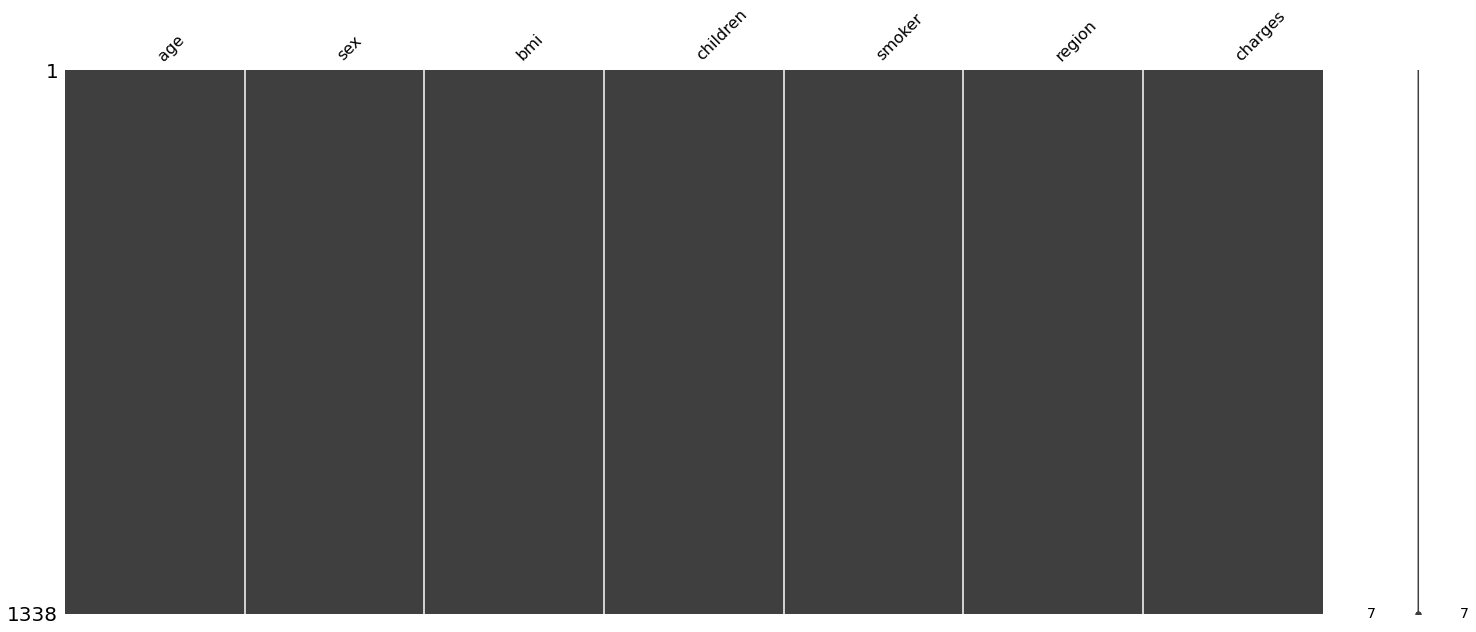

In [71]:
msno.matrix(data);

In [72]:
# data.isnul().any()

#### les doublons 

In [73]:
s = data.duplicated()
data = data.assign(duplicated=s)
data

,age,sex,bmi,children,smoker,region,charges,duplicated
0,19,female,27.900,0,yes,southwest,16884.92400,False
1,18,male,33.770,1,no,southeast,1725.55230,False
2,28,male,33.000,3,no,southeast,4449.46200,False
3,33,male,22.705,0,no,northwest,21984.47061,False
4,32,male,28.880,0,no,northwest,3866.85520,False
...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,False
1334,18,female,31.920,0,no,northeast,2205.98080,False
1335,18,female,36.850,0,no,southeast,1629.83350,False
1336,21,female,25.800,0,no,southwest,2007.94500,False


In [74]:
data['duplicated'].unique()

array([False,  True])

In [75]:
duplicate_rows = data[data["duplicated"] == True]
print(duplicate_rows)

     age   sex    bmi  children smoker     region    charges  duplicated
581   19  male  30.59         0     no  northwest  1639.5631        True


In [76]:
data.loc[data['charges'].duplicated(keep=False),:]

,age,sex,bmi,children,smoker,region,charges,duplicated
195,19,male,30.59,0,no,northwest,1639.5631,False
581,19,male,30.59,0,no,northwest,1639.5631,True


In [77]:
data['charges'].min()

1121.8739

In [78]:
def classify_bmi(row):
    if row["bmi"] < 25:
        return "normal"
    elif row["bmi"] < 30:
        return "overweight"
    else:
        return "obese"

data["bmi_class"] = data.apply(classify_bmi, axis=1)
data

,age,sex,bmi,children,smoker,region,charges,duplicated,bmi_class
0,19,female,27.900,0,yes,southwest,16884.92400,False,overweight
1,18,male,33.770,1,no,southeast,1725.55230,False,obese
2,28,male,33.000,3,no,southeast,4449.46200,False,obese
3,33,male,22.705,0,no,northwest,21984.47061,False,normal
4,32,male,28.880,0,no,northwest,3866.85520,False,overweight
...,...,...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830,False,obese
1334,18,female,31.920,0,no,northeast,2205.98080,False,obese
1335,18,female,36.850,0,no,southeast,1629.83350,False,obese
1336,21,female,25.800,0,no,southwest,2007.94500,False,overweight


<AxesSubplot:xlabel='sex', ylabel='count'>

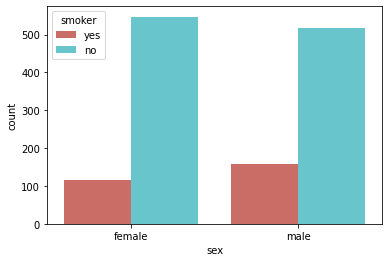

In [79]:
sns.countplot(x='sex', data = data, hue = 'smoker', palette= 'hls')

<AxesSubplot:xlabel='sex', ylabel='charges'>

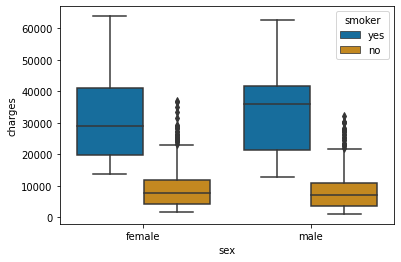

In [80]:
sns.boxplot(x='sex', y= 'charges', data = data, hue = 'smoker',
                     palette= 'colorblind')

<AxesSubplot:xlabel='sex', ylabel='charges'>

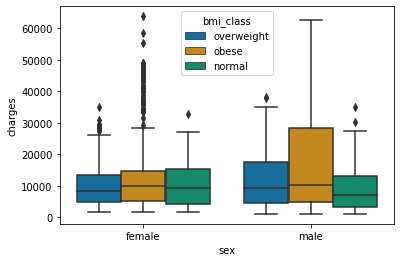

In [81]:
sns.boxplot(x='sex', y= 'charges', data = data, hue = 'bmi_class',
                     palette= 'colorblind')

<AxesSubplot:xlabel='region', ylabel='charges'>

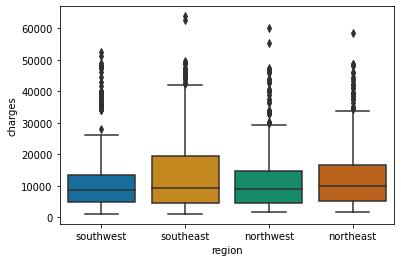

In [82]:
sns.boxplot(x='region', y= 'charges', data = data,
                     palette= 'colorblind')

<AxesSubplot:xlabel='region', ylabel='charges'>

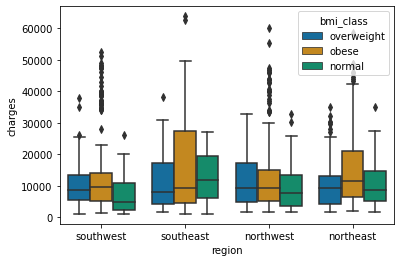

In [83]:
sns.boxplot(x='region', y= 'charges', data = data, hue = 'bmi_class',
                     palette= 'colorblind')

<AxesSubplot:xlabel='charges', ylabel='Count'>

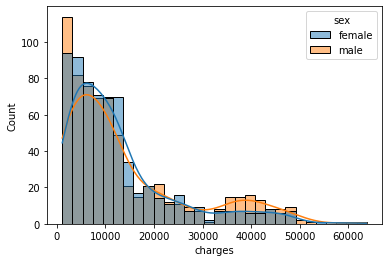

In [84]:
sns.histplot(x = 'charges', data = data, hue = 'sex', kde = True)


In [85]:
# fig, ax = plt.subplots(1,2,figsize=(10,7))
# plt.sca(ax[0])
# sns.histplot(x= 'charges', data = data[data['smoker']=='No'],
#                          bins = 25, color = 'red')
# plt.title("Smoker = No")

# plt.sca(ax[1])
# sns.histplot(x= 'charges', data = data[data['smoker']=='Yes'], bins = 25)
# plt.title("Smoker = Yes")


<AxesSubplot:xlabel='age', ylabel='charges'>

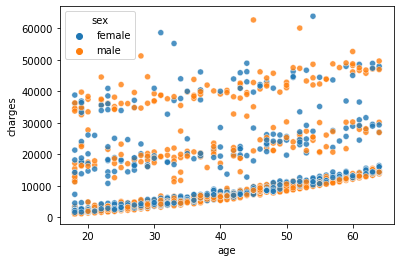

In [86]:
sns.scatterplot(x='age', y='charges', data = data,
                            alpha= 0.8, color = 'blue', hue = 'sex')

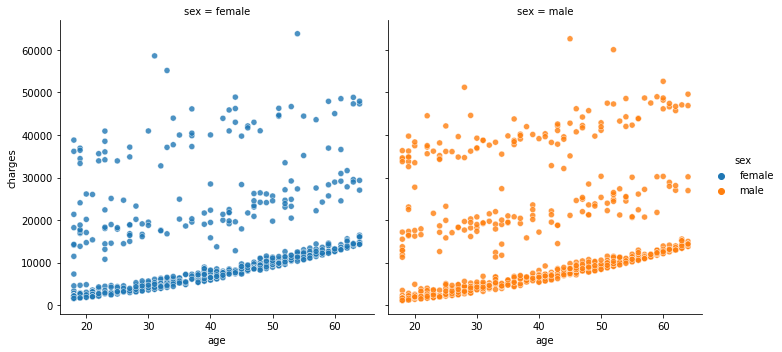

In [87]:
sns.relplot(x='age', y='charges', data = data,
            alpha= 0.8, color = 'blue', hue = 'sex',
                                kind = 'scatter', col = 'sex')

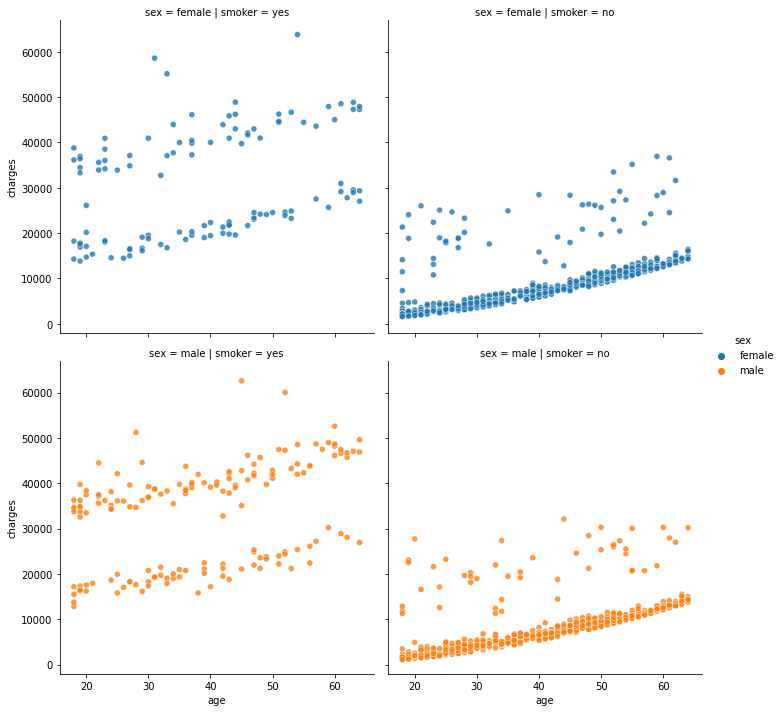

In [88]:
sns.relplot(x='age', y='charges', data = data,
            alpha= 0.8, color = 'blue', hue = 'sex',
                                kind = 'scatter', row = 'sex', col = 'smoker')

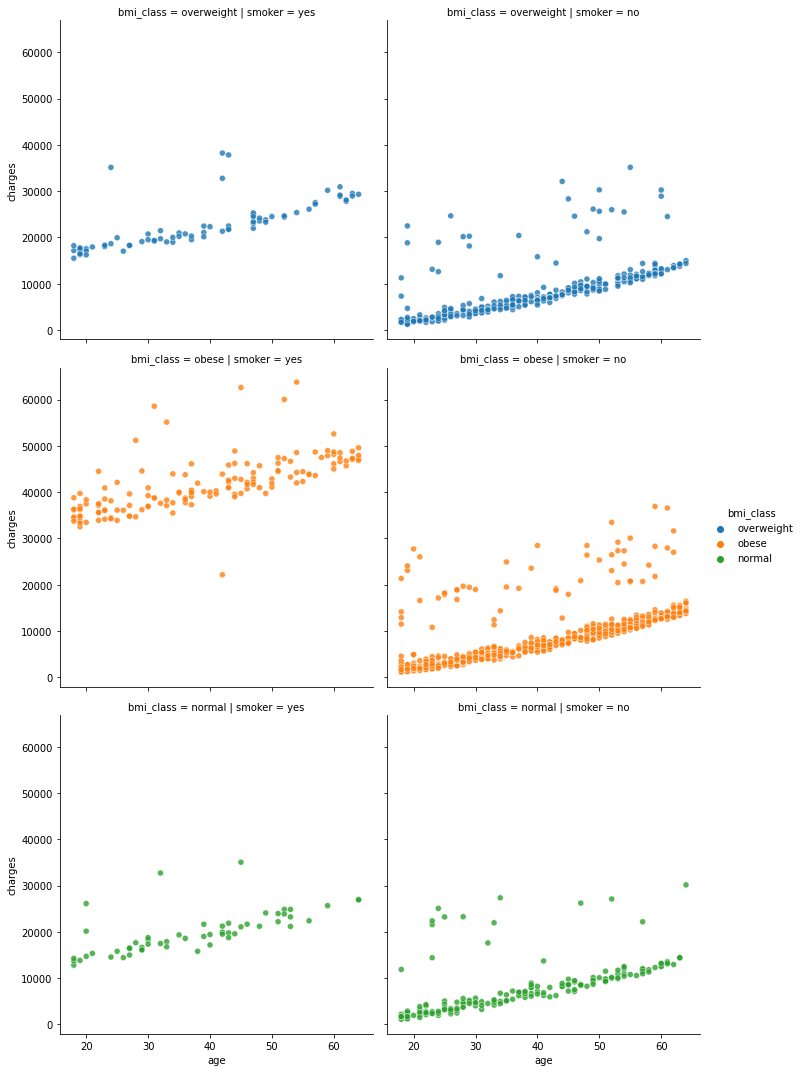

In [89]:
sns.relplot(x='age', y='charges', data = data,
            alpha= 0.8, color = 'blue', hue = 'bmi_class',
                                kind = 'scatter', row = 'bmi_class', col = 'smoker')

In [90]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


# Mesures de concentration 
## sont le plus souvent utilisées pour des sommes d'argent ! Étudier la concentration d'argent, c'est regarder si l'argent est réparti de manière égalitaire ou pas.

Ce que l'on va regarder, c'est si tout l'argent que vous dépensez se concentre en quelques opérations bancaires, ou si au contraire, il est bien réparti parmi les opérations. Dire que votre argent se concentre sur quelques opérations signifie que généralement, vous faites de très nombreuses petites dépenses, et que parfois, il vous arrive de faire quelques dépenses énormes.

Au contraire, l'argent que vous dépensez est bien réparti si toutes vos opérations bancaires (sortantes) ont à peu près le même montant.

Pour visualiser cela, nous utilisons la `courbe de Lorenz`

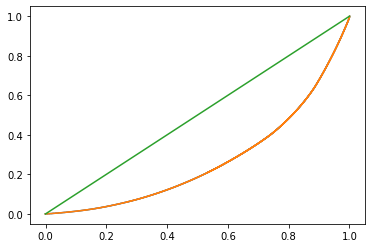

In [91]:

dep = data['charges']
n = len(dep)
lorenz = np.cumsum(np.sort(dep)) / dep.sum()
lorenz = np.append([0],lorenz) # La courbe de Lorenz commence à 0

xaxis = np.linspace(0-1/n,1+1/n,n+1) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.pyplot.plot(xaxis,lorenz,drawstyle='steps-post')

xaxis = np.linspace(0-1/n,1+1/n,len(lorenz)) #Il y a un segment de taille n pour chaque individu, plus 1 segment supplémentaire d'ordonnée 0. Le premier segment commence à 0-1/n, et le dernier termine à 1+1/n.
plt.pyplot.plot(xaxis,lorenz,drawstyle='steps-post')
plt.pyplot.plot([0,1], [0,1]) #tracer la bisséctrice

# plt.show()

#### l'indice de Gini
La courbe de Lorenz n'est pas une statistique, c'est une courbe ! Du coup, on a créé l'indice de Gini, qui résume la courbe de Lorenz.

Il mesure l'aire présente entre la première bissectrice et la courbe de Lorenz. Plus précisément, si on note S cette aire, alors :

gini=2 × S


L'indice de Gini est un indicateur statistique utilisé pour mesurer l'égalité dans une société ou une distribution. Plus précisément, l'indice de Gini mesure la dispersion des valeurs autour de la médiane d'une distribution, en utilisant une échelle de 0 à 1, où 0 représente une distribution parfaite de l'égalité (c'est-à-dire une situation où chaque individu dans la distribution a la même valeur) et 1 représente une distribution parfaite de l'inégalité (c'est-à-dire une situation où un seul individu dans la distribution a toutes les valeurs et tous les autres n'ont aucune valeur).

L'indice de Gini est souvent utilisé pour mesurer l'inégalité des revenus dans une économie, mais il peut également être utilisé pour mesurer l'inégalité dans d'autres domaines, tels que la distribution de la richesse, la distribution de la santé ou la distribution de l'accès à l'éducation.

In [92]:
AUC = (lorenz.sum() -lorenz[-1]/2 -lorenz[0]/2)/n # Surface sous la courbe de Lorenz. Le premier segment (lorenz[0]) est à moitié en dessous de 0, on le coupe donc en 2, on fait de même pour le dernier segment lorenz[-1] qui est à moitié au dessus de 1.
S = 0.5 - AUC # surface entre la première bissectrice et le courbe de Lorenz
gini = 2*S
gini

0.46312508079259673

On va utiliser l'indice de Gini pour mesurer l'inégalité dans la distribution des assurances. Par exemple, si vous souhaitez savoir si les personnes d'une certaine région ont un accès égal aux assurances de qualité et à des tarifs abordables, vous pouvez utiliser l'indice de Gini pour mesurer l'inégalité dans la distribution de l'accès aux assurances dans cette région. Si l'indice de Gini est élevé, cela indique qu'il y a une forte inégalité dans l'accès aux assurances dans cette région, ce qui pourrait être dû à des facteurs tels que la santé, le revenu, l'emplacement géographique ou d'autres facteurs.

Il est important de noter que l'indice de Gini ne mesure que la dispersion des valeurs autour de la médiane, il ne tient pas compte de la façon dont la distribution est répartie au-dessus ou en dessous de la médiane. Par conséquent, il peut être utile de combiner l'indice de Gini avec d'autres indicateurs pour avoir une image complète de l'inégalité dans la distribution des assurances.

In [93]:
def gini(x):
    total = 0
    for i, xi in enumerate(x[:-1], 1):
        total += np.sum(np.abs(xi - x[i:]))
    return total / (len(x)**2 * np.mean(x))

In [94]:
gini(dep)

0.4631250807925965

In [95]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   age         1338 non-null   int64  
 1   sex         1338 non-null   object 
 2   bmi         1338 non-null   float64
 3   children    1338 non-null   int64  
 4   smoker      1338 non-null   object 
 5   region      1338 non-null   object 
 6   charges     1338 non-null   float64
 7   duplicated  1338 non-null   bool   
 8   bmi_class   1338 non-null   object 
dtypes: bool(1), float64(2), int64(2), object(4)
memory usage: 85.1+ KB


<AxesSubplot:>

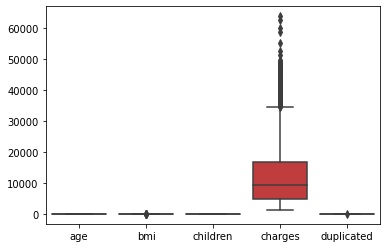

In [96]:
sns.boxplot(data)

In [97]:
import numpy as np
import pandas as pd
dataset= [10,12,12,13,12,11,14,13,15,10,10,10,100,12,14,13, 12,10, 10,11,12,15,12,13,12,11,14,13,15,10,15,12,10,14,13,15,10]

In [111]:
outliers=[]
def detect_outlier(data_1):
    
    threshold=2
    mean_1 = np.mean(data_1)
    std_1 =np.std(data_1)
    
    
    for y in data_1:
        z_score= (y - mean_1)/std_1 
        if np.abs(z_score) > threshold:
            outliers.append(y)
    return outliers

In [112]:
outlier_datapoints = detect_outlier(data['charges'])
print(outlier_datapoints)

[39611.7577, 37701.8768, 38711.0, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 48824.45, 43753.33705, 38511.6283, 47305.305, 44260.7499, 41097.16175, 43921.1837, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 42760.5022, 47928.03, 48517.56315, 41919.097, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 48885.13561, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.07448, 43943.8761, 39241.442, 42969.8527, 40182.246, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.89, 40273.6455, 44400.4064, 40932.4295, 40419.0191, 44585.45587, 43254.41795, 38792.6856, 55135.40209, 43813.8661, 39597.4072, 45008.9555, 42111.6647, 40974.1649, 46113.511, 46255.1125, 44202.6536, 48673.5588, 39047.285, 47462.894, 38998.546, 41999.52, 41034.2214, 42211.1382, 44423.803, 37484.4493, 39725.51805, 44501.3

<AxesSubplot:xlabel='charges'>

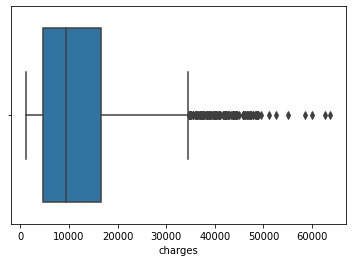

In [100]:
sns.boxplot(x = data['charges'])

In [108]:
import matplotlib.pyplot as plt
from matplotlib.cbook import boxplot_stats
import pandas as pd
import seaborn as sns


outliers = [y for stat in boxplot_stats(data['charges']) for y in stat['fliers']]
print(len(outliers))
print(outliers)


139
[39611.7577, 36837.467, 37701.8768, 38711.0, 35585.576, 51194.55914, 39774.2763, 48173.361, 38709.176, 37742.5757, 47496.49445, 37165.1638, 39836.519, 43578.9394, 47291.055, 47055.5321, 39556.4945, 40720.55105, 36950.2567, 36149.4835, 48824.45, 43753.33705, 37133.8982, 34779.615, 38511.6283, 35160.13457, 47305.305, 44260.7499, 41097.16175, 43921.1837, 36219.40545, 46151.1245, 42856.838, 48549.17835, 47896.79135, 42112.2356, 38746.3551, 42124.5153, 34838.873, 35491.64, 42760.5022, 47928.03, 48517.56315, 41919.097, 36085.219, 38126.2465, 42303.69215, 46889.2612, 46599.1084, 39125.33225, 37079.372, 35147.52848, 48885.13561, 36197.699, 38245.59327, 48675.5177, 63770.42801, 45863.205, 39983.42595, 45702.02235, 58571.07448, 43943.8761, 39241.442, 42969.8527, 40182.246, 34617.84065, 42983.4585, 42560.4304, 40003.33225, 45710.20785, 46200.9851, 46130.5265, 40103.89, 34806.4677, 40273.6455, 44400.4064, 40932.4295, 40419.0191, 36189.1017, 44585.45587, 43254.41795, 36307.7983, 38792.6856, 551

In [102]:
# Extract the outlier values from the data
stats = boxplot_stats(data['charges'])
fliers = stats.pop(0)['fliers']

In [103]:
data['charges']

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64